## Tutorial Setup

### Check your install

In [1]:
import numpy

In [2]:
import scipy

In [3]:
import matplotlib

In [4]:
import sklearn

In [5]:
import psutil

In [6]:
import pandas

In [7]:
import IPython.parallel

/Users/kjprice/anaconda/lib/python3.6/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


Finding the location of an installed package and its version:

In [8]:
numpy.__path__

['/Users/kjprice/anaconda/lib/python3.6/site-packages/numpy']

In [9]:
numpy.__version__

'1.11.3'

### Check that you have the datasets

In [10]:
%run ../fetch_data.py
# %run ../fetch_data.py twenty_newsgroups sentiment140 covertype

Using existing dataset folder:/Users/kjprice/Library/Projects/machine_learning/parallel_ml_tutorial/datasets


In [11]:
import os
for fname in os.listdir('../datasets/'):
    print(fname)

## A NumPy primer

### NumPy array dtypes and shapes

In [12]:
import numpy as np

In [13]:
a = np.array([1, 2, 3])

In [14]:
a

array([1, 2, 3])

In [15]:
b = np.array([[0, 2, 4], [1, 3, 5]])

In [16]:
b

array([[0, 2, 4],
       [1, 3, 5]])

In [17]:
b.shape

(2, 3)

In [18]:
b.dtype

dtype('int64')

In [19]:
a.shape

(3,)

In [20]:
a.dtype

dtype('int64')

In [21]:
np.zeros(5)

array([ 0.,  0.,  0.,  0.,  0.])

In [22]:
np.ones(shape=(3, 4), dtype=np.int32)

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=int32)

### Common array operations

In [23]:
c = b * 0.5

In [24]:
c

array([[ 0. ,  1. ,  2. ],
       [ 0.5,  1.5,  2.5]])

In [25]:
c.shape

(2, 3)

In [26]:
c.dtype

dtype('float64')

In [27]:
a

array([1, 2, 3])

In [28]:
d = a + c

In [29]:
d

array([[ 1. ,  3. ,  5. ],
       [ 1.5,  3.5,  5.5]])

In [30]:
d[0]

array([ 1.,  3.,  5.])

In [31]:
d[0, 0]

1.0

In [32]:
d[:, 0]

array([ 1. ,  1.5])

In [33]:
d.sum()

19.5

In [34]:
d.mean()

3.25

In [35]:
d.sum(axis=0)

array([  2.5,   6.5,  10.5])

In [36]:
d.mean(axis=1)

array([ 3. ,  3.5])

### Reshaping and inplace update

In [37]:
e = np.arange(12)

In [38]:
e

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [39]:
f = e.reshape(3, 4)

In [40]:
f

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [41]:
e

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [42]:
e[5:] = 0

In [43]:
e

array([0, 1, 2, 3, 4, 0, 0, 0, 0, 0, 0, 0])

In [44]:
f

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

### Combining arrays

In [45]:
a

array([1, 2, 3])

In [46]:
b

array([[0, 2, 4],
       [1, 3, 5]])

In [47]:
d

array([[ 1. ,  3. ,  5. ],
       [ 1.5,  3.5,  5.5]])

In [48]:
np.concatenate([a, a, a])

array([1, 2, 3, 1, 2, 3, 1, 2, 3])

In [49]:
np.vstack([a, b, d])

array([[ 1. ,  2. ,  3. ],
       [ 0. ,  2. ,  4. ],
       [ 1. ,  3. ,  5. ],
       [ 1. ,  3. ,  5. ],
       [ 1.5,  3.5,  5.5]])

In [50]:
np.hstack([b, d])

array([[ 0. ,  2. ,  4. ,  1. ,  3. ,  5. ],
       [ 1. ,  3. ,  5. ,  1.5,  3.5,  5.5]])

## A Matplotlib primer

In [51]:
%matplotlib inline

In [52]:
import matplotlib.pyplot as plt

In [53]:
x = np.linspace(0, 2, 10)

In [54]:
x

array([ 0.        ,  0.22222222,  0.44444444,  0.66666667,  0.88888889,
        1.11111111,  1.33333333,  1.55555556,  1.77777778,  2.        ])

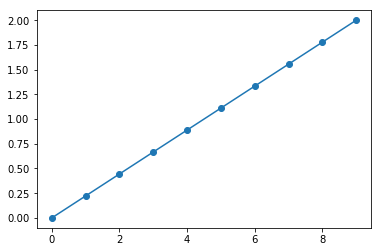

In [55]:
plt.plot(x, 'o-');

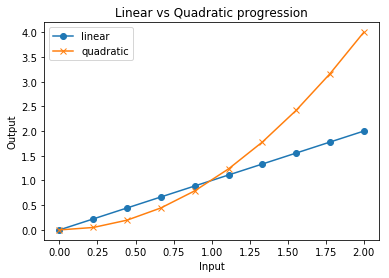

In [56]:
plt.plot(x, x, 'o-', label='linear')
plt.plot(x, x ** 2, 'x-', label='quadratic')

plt.legend(loc='best')
plt.title('Linear vs Quadratic progression')
plt.xlabel('Input')
plt.ylabel('Output');

In [57]:
samples = np.random.normal(loc=1.0, scale=0.5, size=1000)

In [58]:
samples.shape

(1000,)

In [59]:
samples.dtype

dtype('float64')

In [60]:
samples[:30]

array([ 1.24983845,  0.94462976,  0.60226707,  0.85312659,  0.48541881,
        0.85939466, -0.12247639,  1.47075459,  1.13623485,  1.01578892,
        1.453564  ,  0.96592152,  0.33182848,  1.35455371,  0.83500781,
        1.24724345,  0.91166561,  1.07645139,  1.71043414,  1.37683055,
        0.88593124,  0.91830515,  1.0127718 ,  0.3263869 ,  0.59501456,
        1.05149373,  0.40174567,  0.54706666,  0.07812298,  2.29652451])

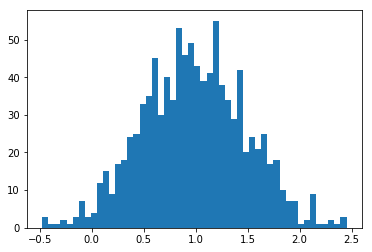

In [61]:
plt.hist(samples, bins=50);

In [62]:
samples_1 = np.random.normal(loc=1, scale=.5, size=10000)
samples_2 = np.random.standard_t(df=10, size=10000)

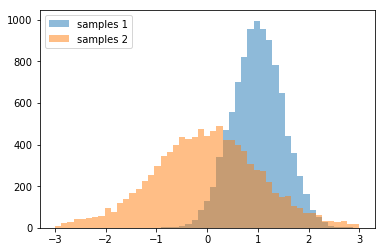

In [63]:
bins = np.linspace(-3, 3, 50)
_ = plt.hist(samples_1, bins=bins, alpha=0.5, label='samples 1')
_ = plt.hist(samples_2, bins=bins, alpha=0.5, label='samples 2')
plt.legend(loc='upper left');

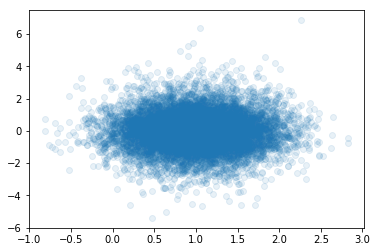

In [64]:
plt.scatter(samples_1, samples_2, alpha=0.1);

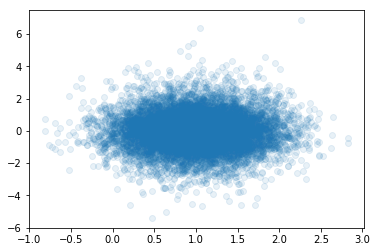

In [64]:
plt.scatter(samples_1, samples_2, alpha=0.1);

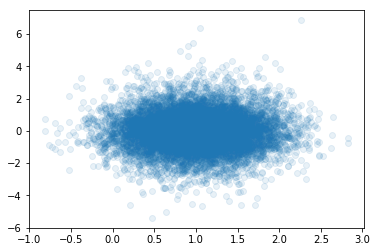

In [64]:
plt.scatter(samples_1, samples_2, alpha=0.1);